# Applicant Intelligence

A unique project by Ahmed S Ali under the guidance of Vineet Kachhawa -  Sr. Solutions Architect at AWS.

The aim of this project was to learn about the ever shifting landscape of job skills and experiences. As the nature of work continues to change, so do the requirements of the companies and departments looking to hire for these changing needs. This project aims to capture the trends in new jobs, skills, experiences, and requirements.  

You can find me at https://www.linkedin.com/in/ahmedshahrukhali/ Or you can find Vineet at https://www.linkedin.com/in/vkachhawaha/ for more details.

In [ ]:
import pandas as pd


In [ ]:
def fetch_and_clean_data():
    data_url = 'https://storage.googleapis.com/gsearch_share/gsearch_jobs.csv'
    jobs_data = pd.read_csv(data_url).replace("'","", regex=True)
    jobs_data.date_time = pd.to_datetime(jobs_data.date_time)
    jobs_data = jobs_data.drop(labels=['Unnamed: 0', 'index'], axis=1, errors='ignore')
    jobs_data.description_tokens = jobs_data.description_tokens.str.strip("[]").str.split(",") # fix major formatting issues with tokens
    jobs_data.description_tokens = jobs_data.description_tokens.apply(lambda row: [x.strip(" ") for x in row]) # remove whitespace from tokens
    return jobs_data

df = fetch_and_clean_data()

Below the Location is reduced to only City & N/A Values dropped and types set to string

In [ ]:
df5 = df3['Description'].convert_dtypes()
df5.dtypes
df5.dropna(inplace=True)
df5.dtypes

StringDtype

A Keyword Count Below

In [ ]:
df5['py']=df5.apply(lambda x: 'yes' if 'python' in x.lower() else 0)
df5.py.value_counts()

#number of mentions could be used for weight

yes    626
0      332
Name: Description, dtype: int64

A WordCloud Example Below

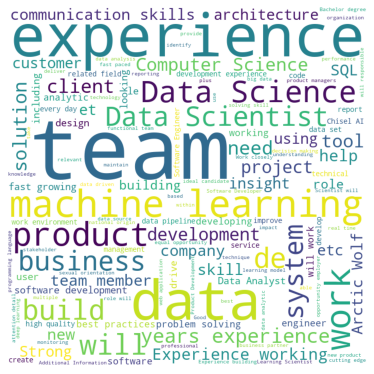

In [ ]:
#nice library to produce wordclouds
from wordcloud import WordCloud

import matplotlib.pyplot as plt
# if uising a Jupyter notebook, include:
%matplotlib inline

all_words = ''

#looping through all incidents and joining them to one text, to extract most common words
for arg in df5["Description"]:

    tokens = arg.split()

    all_words += " ".join(tokens)+" "

wordcloud = WordCloud(width = 700, height = 700,
                background_color ='white',
                min_font_size = 10).generate(all_words)

# plot the WordCloud image
plt.figure(figsize = (5, 5), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)

plt.show()

Textual Preprocessing Below (ATTEMPT)

In [ ]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

def preprocess(raw_text):

    #regular expression keeping only letters
    letters_only_text = re.sub("[^a-zA-Z]", " ", raw_text)

    # convert to lower case and split into words -> convert string into list ( 'hello world' -> ['hello', 'world'])
    words = letters_only_text.lower().split()

    cleaned_words = []
    lemmatizer = PorterStemmer() #plug in here any other stemmer or lemmatiser you want to try out

    # remove stopwords
    for word in words:
        if word not in stop_words:
            cleaned_words.append(word)

    # stemm or lemmatise words
    stemmed_words = []
    for word in cleaned_words:
        word = lemmatizer.stem(word)   #dont forget to change stem to lemmatize if you are using a lemmatizer
        stemmed_words.append(word)

    # converting list back to string
    return " ".join(stemmed_words)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
df5['test'] = df5['Description'].apply(preprocess)
data1 = df5['test'].iloc[0] + df5['test'].iloc[1]  + df5['test'].iloc[2]
data1

'arteria ai arteria ai made passion rapidli grow team lawyer data scientist develop design vision build transform ai enabl solut busi world mission help compani transform interact import document contract award win technolog intellig contract look enthusiast individu want grow win us posit data scientist arteria ai play activ role develop product power machin learn natur languag process part enterpris saa platform digit contract great role anybodi interest make impact join friendli team driven innov growth ideal candid curiou data scientist strong problem solv skill deep understand nlp deep learn visual model techniqu work team look great team player enjoy solv challeng problem role work alongsid data scientist engin product team build optim pipelin varieti task inform extract recommend system classif legal text specif contract integr part end end creation product lifecycl ideat launch product use variou nlp techniqu text classif provis identif entiti recognit disambigu meta data extra

In [ ]:
df5['test'].iloc[1]

'titl data scientist locat canada toronto prefer us canada remot consid seek highli motiv data scientist join grow workforc manag organ infor workforc manag power schedul solut focus employe schedul time attend track serv fortun client portfolio core role focu optim machin learn scenario infor best class workforc manag solut day life typic includ design develop test improv machin learn optim model enterpris schedul applic advis intern extern stakehold new opportun enabl machin learn infor work product manag infor custom understand busi problem identifi intern extern data requir formul data enrich strategi enterpris applic perform exploratori data analysi assess commun data qualiti extract share insight larg complex dataset perform featur engin model select model perform tune base metric driven approach craft conduct analyz interpret experi investig collabor data engin solut architect data model build requir data transform support scientif model collabor applic develop product manag tem

In [ ]:
from collections import Counter
Counter(" ".join(df5["test"]).split()).most_common(20)

[('data', 1223),
 ('experi', 867),
 ('work', 836),
 ('team', 745),
 ('develop', 600),
 ('product', 478),
 ('learn', 397),
 ('busi', 355),
 ('build', 330),
 ('analyt', 312),
 ('softwar', 304),
 ('engin', 301),
 ('de', 295),
 ('model', 287),
 ('compani', 272),
 ('skill', 264),
 ('scienc', 238),
 ('use', 236),
 ('manag', 232),
 ('system', 231)]

WordCloud on Lemmatized

In [ ]:
#nice library to produce wordclouds
from wordcloud import WordCloud

import matplotlib.pyplot as plt
# if uising a Jupyter notebook, include:
%matplotlib inline

all_words = ''

#looping through all incidents and joining them to one text, to extract most common words
for arg in df5["test"]:

    tokens = arg.split()

    all_words += " ".join(tokens)+" "

wordcloud = WordCloud(width = 700, height = 700,
                background_color ='white',
                min_font_size = 10).generate(all_words)

# plot the WordCloud image
plt.figure(figsize = (5, 5), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)

plt.show()

In [ ]:
df5.Title1.value_counts()

Google                        9
Auth0                         9
Arctic Wolf                   8
National Bank of Canada       8
Microsoft                     8
                             ..
Agnico Eagle Mines Limited    1
CIBC                          1
Jerry                         1
Staples Canada                1
dentsu international          1
Name: Title1, Length: 314, dtype: Int64

In [ ]:
from nltk.util import ngrams
n_gram = 2
n_gram_dic = dict(Counter(ngrams(all_words.split(), n_gram)))

for i in n_gram_dic:
    if n_gram_dic[i] >= 50:
        print(i, n_gram_dic[i])

('is', 'a') 124
('of', 'a') 66
('with', 'a') 90
('to', 'build') 67
('for', 'the') 88
('looking', 'for') 148
('machine', 'learning') 114
('part', 'of') 66
('of', 'our') 119
('We', 'are') 204
('as', 'a') 64
('are', 'looking') 78
('teams', 'to') 67
('for', 'a') 89
('such', 'as') 102
('You', 'will') 128
('will', 'be') 122
('of', 'the') 196
('and', 'data') 62
('to', 'be') 57
('data', 'science') 54
('in', 'a') 149
('Machine', 'Learning') 69
('knowledge', 'of') 62
('experience', 'with') 60
('working', 'with') 81
('data', 'and') 54
('to', 'join') 52
('on', 'the') 117
('and', 'build') 51
('experience', 'in') 99
('Experience', 'with') 149
('years', 'of') 113
('of', 'experience') 73
('work', 'with') 83
('have', 'a') 62
('to', 'the') 109
('as', 'well') 65
('well', 'as') 64
('If', 'you') 55
('in', 'the') 155
('with', 'the') 111
('you', 'will') 56
('and', 'the') 55
('to', 'our') 52
('the', 'data') 52
('Ability', 'to') 63
('to', 'work') 98
('team', 'members') 51
('Experience', 'working') 64
('to', 'm

RAKE Method - A New Attempt
https://pypi.org/project/rake-nltk/

In [ ]:
!pip install rake-nltk
from rake_nltk import Metric, Rake

# r = Rake() # Uses stopwords for english from NLTK, and all puntuation characters.
r = Rake()
r = Rake(min_length=1, max_length=2)
r.extract_keywords_from_text(df5.iloc[2]['Description'])

r.get_ranked_phrases() # To get keyword phrases ranked highest to lowest.

In [ ]:

len(r.get_ranked_phrases()) # To get keyword phrases ranked highest to lowest.

77

An in-detail Attempt

In [ ]:
df5.columns

Index(['Title', 'Title1', 'Description', 'City', 'py', 'test'], dtype='object')

In [ ]:
import nltk
nltk.download('averaged_perceptron_tagger')

# got these keywords by looking at some examples and using existing knowledge.
tool_keywords1 = ['python', 'pytorch', 'sql', 'mxnet', 'mlflow', 'einstein', 'theano', 'pyspark', 'solr', 'mahout',
 'cassandra', 'aws', 'powerpoint', 'spark', 'pig', 'sas', 'java', 'nosql', 'docker', 'salesforce', 'scala', 'r',
 'c', 'c++', 'net', 'tableau', 'pandas', 'scikitlearn', 'sklearn', 'matlab', 'scala', 'keras', 'tensorflow', 'clojure',
 'caffe', 'scipy', 'numpy', 'matplotlib', 'vba', 'spss', 'linux', 'azure', 'cloud', 'gcp', 'mongodb', 'mysql', 'oracle',
 'redshift', 'snowflake', 'kafka', 'javascript', 'qlik', 'jupyter', 'perl', 'bigquery', 'unix', 'react',
 'scikit', 'powerbi', 's3', 'ec2', 'lambda', 'ssrs', 'kubernetes', 'hana', 'spacy', 'tf', 'django', 'sagemaker',
 'seaborn', 'mllib', 'github', 'git', 'elasticsearch', 'splunk', 'airflow', 'looker', 'rapidminer', 'birt', 'pentaho',
 'jquery', 'nodejs', 'd3', 'plotly', 'bokeh', 'xgboost', 'rstudio', 'shiny', 'dash', 'h20', 'h2o', 'hadoop', 'mapreduce',
 'hive', 'cognos', 'angular', 'nltk', 'flask', 'node', 'firebase', 'bigtable', 'rust', 'php', 'cntk', 'lightgbm',
 'kubeflow', 'rpython', 'unixlinux', 'postgressql', 'postgresql', 'postgres', 'hbase', 'dask', 'ruby', 'julia', 'tensor',
# added r packages doesn't seem to impact the result
 'dplyr','ggplot2','esquisse','bioconductor','shiny','lubridate','knitr','mlr','quanteda','dt','rcrawler','caret','rmarkdown',
 'leaflet','janitor','ggvis','plotly','rcharts','rbokeh','broom','stringr','magrittr','slidify','rvest',
 'rmysql','rsqlite','prophet','glmnet','text2vec','snowballc','quantmod','rstan','swirl','datasciencer']


# another set of keywords that are longer than one word.
tool_keywords2 = set(['amazon web services', 'google cloud', 'sql server'])



# hard skills/knowledge required.
skill_keywords1 = set(['statistics', 'cleansing', 'chatbot', 'cleaning', 'blockchain', 'causality', 'correlation', 'bandit', 'anomaly', 'kpi',
 'dashboard', 'geospatial', 'ocr', 'econometrics', 'pca', 'gis', 'svm', 'svd', 'tuning', 'hyperparameter', 'hypothesis',
 'salesforcecom', 'segmentation', 'biostatistics', 'unsupervised', 'supervised', 'exploratory',
 'recommender', 'recommendations', 'research', 'sequencing', 'probability', 'reinforcement', 'graph', 'bioinformatics',
 'chi', 'knn', 'outlier', 'etl', 'normalization', 'classification', 'optimizing', 'prediction', 'forecasting',
 'clustering', 'cluster', 'optimization', 'visualization', 'nlp', 'c#',
 'regression', 'logistic', 'nn', 'cnn', 'glm',
 'rnn', 'lstm', 'gbm', 'boosting', 'recurrent', 'convolutional', 'bayesian',
 'bayes'])


# another set of keywords that are longer than one word.
skill_keywords2 = set(['random forest', 'natural language processing', 'machine learning', 'decision tree', 'deep learning', 'experimental design',
 'time series', 'nearest neighbors', 'neural network', 'support vector machine', 'computer vision', 'machine vision', 'dimensionality reduction',
 'text analytics', 'power bi', 'a/b testing', 'ab testing', 'chat bot', 'data mining'])



degree_dict = {'bs': 1, 'bachelor': 1, 'undergraduate': 1,
               'master': 2, 'graduate': 2, 'mba': 2.5,
               'phd': 3, 'ph.d': 3, 'ba': 1, 'ma': 2,
               'postdoctoral': 4, 'postdoc': 4, 'doctorate': 3}


degree_dict2 = {'advanced degree': 2, 'ms or': 2, 'ms degree': 2, '4 year degree': 1, 'bs/': 1, 'ba/': 1,
                '4-year degree': 1, 'b.s.': 1, 'm.s.': 2, 'm.s': 2, 'b.s': 1, 'phd/': 3, 'ph.d.': 3, 'ms/': 2,
                'm.s/': 2, 'm.s./': 2, 'msc/': 2, 'master/': 2, 'master\'s/': 2, 'bachelor\s/': 1}
degree_keywords2 = set(degree_dict2.keys())





from nltk.tokenize import word_tokenize
word_tokenize(df5['Description'].iloc[0])



from nltk import pos_tag
from nltk.stem import PorterStemmer

pos_tag(tool_keywords1)

ps = PorterStemmer()


# process the job description.
def prepare_job_desc(desc):
    # tokenize description.
    tokens = word_tokenize(desc)

    # Parts of speech (POS) tag tokens.
    token_tag = pos_tag(tokens)

    # Only include some of the POS tags.
    include_tags = ['VBN', 'VBD', 'JJ', 'JJS', 'JJR', 'CD', 'NN', 'NNS', 'NNP', 'NNPS']
    filtered_tokens = [tok for tok, tag in token_tag if tag in include_tags]

    # stem words.
    stemmed_tokens = [ps.stem(tok).lower() for tok in filtered_tokens]
    return set(stemmed_tokens)

df5['job_description_word_set'] = df5['Description'].map(prepare_job_desc)

# process the keywords
tool_keywords1_set = set([ps.stem(tok) for tok in tool_keywords1]) # stem the keywords (since the job description is also stemmed.)
tool_keywords1_dict = {ps.stem(tok):tok for tok in tool_keywords1} # use this dictionary to revert the stemmed words back to the original.

skill_keywords1_set = set([ps.stem(tok) for tok in skill_keywords1])
skill_keywords1_dict = {ps.stem(tok):tok for tok in skill_keywords1}

degree_keywords1_set = set([ps.stem(tok) for tok in degree_dict.keys()])
degree_keywords1_dict = {ps.stem(tok):tok for tok in degree_dict.keys()}

df5['job_description_word_set'].iloc[10]

tool_list = []
skill_list = []
degree_list = []

msk = df5['City'] != '' # just in case you want to filter the data.

num_postings = len(df5[msk].index)
for i in range(num_postings):
    job_desc = df5[msk].iloc[i]['Description'].lower()
    job_desc_set = df5[msk].iloc[i]['job_description_word_set']

    # check if the keywords are in the job description. Look for exact match by token.
    tool_words = tool_keywords1_set.intersection(job_desc_set)
    skill_words = skill_keywords1_set.intersection(job_desc_set)
    degree_words = degree_keywords1_set.intersection(job_desc_set)

    # check if longer keywords (more than one word) are in the job description. Match by substring.
    j = 0
    for tool_keyword2 in tool_keywords2:
        # tool keywords.
        if tool_keyword2 in job_desc:
            tool_list.append(tool_keyword2)
            j += 1

    k = 0
    for skill_keyword2 in skill_keywords2:
        # skill keywords.
        if skill_keyword2 in job_desc:
            skill_list.append(skill_keyword2)
            k += 1

    # search for the minimum education.
    min_education_level = 999
    for degree_word in degree_words:
        level = degree_dict[degree_keywords1_dict[degree_word]]
        min_education_level = min(min_education_level, level)

    for degree_keyword2 in degree_keywords2:
        # longer keywords. Match by substring.
        if degree_keyword2 in job_desc:
            level = degree_dict2[degree_keyword2]
            min_education_level = min(min_education_level, level)

    # label the job descriptions without any tool keywords.
    if len(tool_words) == 0 and j == 0:
        tool_list.append('nothing specified')

    # label the job descriptions without any skill keywords.
    if len(skill_words) == 0 and k == 0:
        skill_list.append('nothing specified')

    # If none of the keywords were found, but the word degree is present, then assume it's a bachelors level.
    if min_education_level > 500:
        if 'degree' in job_desc:
            min_education_level = 1

    tool_list += list(tool_words)
    skill_list += list(skill_words)
    degree_list.append(min_education_level)

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


In [ ]:
# create the list of tools.
df_tool = pd.DataFrame(data={'cnt': tool_list})
df_tool = df_tool.replace(tool_keywords1_dict)

# group some of the categories together.
msk = df_tool['cnt'] == 'h20'
df_tool.loc[msk, 'cnt'] = 'h2o'

msk = df_tool['cnt'] == 'aws'
df_tool.loc[msk, 'cnt'] = 'amazon web services'

msk = df_tool['cnt'] == 'gcp'
df_tool.loc[msk, 'cnt'] = 'google cloud'

msk = df_tool['cnt'] == 'github'
df_tool.loc[msk, 'cnt'] = 'git'

msk = df_tool['cnt'] == 'postgressql'
df_tool.loc[msk, 'cnt'] = 'postgres'

msk = df_tool['cnt'] == 'tensor'
df_tool.loc[msk, 'cnt'] = 'tensorflow'

df_tool_top50 = df_tool['cnt'].value_counts().reset_index().rename(columns={'index': 'tool'}).iloc[:50]



from plotly import __version__
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly.graph_objs as go
# visualize the tools.
layout = dict(
    title='Tools For Data Scientists',
    yaxis=dict(
        title='% of job postings',
        tickformat=',.0%',
    )
)

fig = go.Figure(layout=layout)
fig.add_trace(go.Bar(
    x=df_tool_top50['tool'],
    y=df_tool_top50['cnt']/num_postings
))

iplot(fig)


In [ ]:
# create the list of skills/knowledge.
df_skills = pd.DataFrame(data={'cnt': skill_list})
df_skills = df_skills.replace(skill_keywords1_dict)

# group some of the categories together.
msk = df_skills['cnt'] == 'nlp'
df_skills.loc[msk, 'cnt'] = 'natural language processing'

msk = df_skills['cnt'] == 'convolutional'
df_skills.loc[msk, 'cnt'] = 'convolutional neural network'

msk = df_skills['cnt'] == 'cnn'
df_skills.loc[msk, 'cnt'] = 'convolutional neural network'

msk = df_skills['cnt'] == 'recurrent'
df_skills.loc[msk, 'cnt'] = 'recurrent neural network'

msk = df_skills['cnt'] == 'rnn'
df_skills.loc[msk, 'cnt'] = 'recurrent neural network'

msk = df_skills['cnt'] == 'knn'
df_skills.loc[msk, 'cnt'] = 'nearest neighbors'

msk = df_skills['cnt'] == 'svm'
df_skills.loc[msk, 'cnt'] = 'support vector machine'

msk = df_skills['cnt'] == 'machine vision'
df_skills.loc[msk, 'cnt'] = 'computer vision'

msk = df_skills['cnt'] == 'ab testing'
df_skills.loc[msk, 'cnt'] = 'a/b testing'

df_skills_top50 = df_skills['cnt'].value_counts().reset_index().rename(columns={'index': 'skill'}).iloc[:50]



# visualize the skills.
layout = dict(
    title='Skills For Data Scientists',
    yaxis=dict(
        title='% of job postings',
        tickformat=',.0%',
    )
)

fig = go.Figure(layout=layout)
fig.add_trace(go.Bar(
    x=df_skills_top50['skill'],
    y=df_skills_top50['cnt']/num_postings
))

iplot(fig)

In [ ]:

# create the list of degree.
df_degrees = pd.DataFrame(data={'cnt': degree_list})
df_degrees['degree_type'] = ''


msk = df_degrees['cnt'] == 1
df_degrees.loc[msk, 'degree_type'] = 'bachelors'

msk = df_degrees['cnt'] == 2
df_degrees.loc[msk, 'degree_type'] = 'masters'

msk = df_degrees['cnt'] == 3
df_degrees.loc[msk, 'degree_type'] = 'phd'

msk = df_degrees['cnt'] == 4
df_degrees.loc[msk, 'degree_type'] = 'postdoc'

msk = df_degrees['cnt'] == 2.5
df_degrees.loc[msk, 'degree_type'] = 'mba'

msk = df_degrees['cnt'] > 500
df_degrees.loc[msk, 'degree_type'] = 'not specified'


df_degree_cnt = df_degrees['degree_type'].value_counts().reset_index().rename(columns={'index': 'degree'}).iloc[:50]



# visualize the degrees.
layout = dict(
    title='Minimum Education For Data Scientists',
    yaxis=dict(
        title='% of job postings',
        tickformat=',.0%',
    )
)

fig = go.Figure(layout=layout)
fig.add_trace(go.Bar(
    x=df_degree_cnt['degree'],
    y=df_degree_cnt['degree_type']/num_postings
))

iplot(fig)

Another New Attempt
https://towardsdatascience.com/deep-learning-for-specific-information-extraction-from-unstructured-texts-12c5b9dceada

In [ ]:
class SkillsExtractorNN:

    def __init__(self, word_features_dim, dense_features_dim):

        lstm_input_phrase = keras.layers.Input(shape=(None, word_features_dim))
        lstm_input_cont = keras.layers.Input(shape=(None, word_features_dim))
        dense_input = keras.layers.Input(shape=(dense_features_dim,))

        lstm_emb_phrase = keras.layers.LSTM(256)(lstm_input_phrase)
        lstm_emb_phrase = keras.layers.Dense(128, activation='relu')(lstm_emb_phrase)

        lstm_emb_cont = keras.layers.LSTM(256)(lstm_input_cont)
        lstm_emb_cont = keras.layers.Dense(128, activation='relu')(lstm_emb_cont)

        dense_emb = keras.layers.Dense(512, activation='relu')(dense_input)
        dense_emb = keras.layers.Dense(256, activation='relu')(dense_emb)

        x = keras.layers.concatenate([lstm_emb_phrase, lstm_emb_cont, dense_emb])
        x = keras.layers.Dense(128, activation='relu')(x)
        x = keras.layers.Dense(64, activation='relu')(x)
        x = keras.layers.Dense(32, activation='relu')(x)

        main_output = keras.layers.Dense(2, activation='softplus')(x)

        self.model = keras.models.Model(inputs=[lstm_input_phrase, lstm_input_cont, dense_input],
                                        outputs=main_output)

        optimizer = keras.optimizers.Adam(lr=0.0001)

        self.model.compile(optimizer=optimizer, loss='binary_crossentropy')


In [ ]:
   def fit(self, x_lstm_phrase, x_lstm_context, x_dense, y, val_split=0.25, patience=5, max_epochs=1000, batch_size=32):

        x_lstm_phrase_seq = keras.preprocessing.sequence.pad_sequences(x_lstm_phrase)
        x_lstm_context_seq = keras.preprocessing.sequence.pad_sequences(x_lstm_context)

        y_onehot = onehot_transform(y)

        self.model.fit([x_lstm_phrase_seq, x_lstm_context_seq, x_dense],
                       y_onehot,
                       batch_size=batch_size,
                       pochs=max_epochs,
                       validation_split=val_split,
                       callbacks=[keras.callbacks.EarlyStopping(monitor='val_loss', patience=patience)])

In [ ]:
    def predict(self, x_lstm_phrase, x_lstm_context, x_dense):

        x_lstm_phrase_seq = keras.preprocessing.sequence.pad_sequences(x_lstm_phrase)
        x_lstm_context_seq = keras.preprocessing.sequence.pad_sequences(x_lstm_context)

        y = self.model.predict([x_lstm_phrase_seq, x_lstm_context_seq, x_dense])

        return y

In [ ]:

def onehot_transform(y):

    onehot_y = []

    for numb in y:
        onehot_arr = np.zeros(2)
        onehot_arr[numb] = 1
        onehot_y.append(np.array(onehot_arr))

    return np.array(onehot_y)

Also Try https://www.kdnuggets.com/2018/10/named-entity-recognition-classification-scikit-learn.html

Related Skills paper https://arxiv.org/pdf/1707.09751.pdf

Word2Vec Intro https://medium.com/@nuripurswani/word2vec-for-talent-acquisition-ab20a23e01d8

Embedding information https://www.kdnuggets.com/2018/11/data-representation-natural-language-processing.html
Embedding article https://everisbrasil.medium.com/using-machine-learning-to-retrieve-relevant-cvs-based-on-job-description-57fc31623845

LSTM + Embedding https://confusedcoders.com/wp-content/uploads/2019/09/Job-Skills-extraction-with-LSTM-and-Word-Embeddings-Nikita-Sharma.pdf

Summary on general text mining https://www.kdnuggets.com/2020/05/text-mining-python-steps-examples.html

Next
https://pub.towardsai.net/natural-language-processing-nlp-with-python-tutorial-for-beginners-1f54e610a1a0#27f3

https://medium.com/analytics-vidhya/classifying-tech-data-job-postings-on-indeed-com-1fd8ca6e7cdd

https://www.kaggle.com/maniksoni/experiments-sentiment-analysis-raw-data-gru-lstm

In [ ]:
# https://medium.com/analytics-vidhya/automated-keyword-extraction-from-articles-using-nlp-bfd864f41b34

dataset = df5

dataset['word_count'] = dataset['Description'].apply(lambda x: len(str(x).split(" ")))
dataset[['Description','word_count']].head()

,Description,word_count
0,Wealthsimple is on a mission to help everyone ...,802
1,About Arteria AI Arteria AI is a made up o...,476
2,"Our large, Fortune Technology client is ranked...",504
3,After growing revenue 112% in 2020 despite the...,488
4,"Company Description Cardinal Path, part of de...",613


In [ ]:
# common words
freq = pd.Series(' '.join(dataset['Description']).split()).value_counts()[:20]
freq

#uncommon words
freq1 = pd.Series(' '.join(dataset['Description']).split()).value_counts()[-20:]
freq1

#stemming and lemmatization example
import nltk
nltk.download('wordnet')
from nltk.stem.porter import PorterStemmer

from nltk.stem.wordnet import WordNetLemmatizer
lem = WordNetLemmatizer()
stem = PorterStemmer()
word = "inversely"
print("stemming:",stem.stem(word))
print("lemmatization:", lem.lemmatize(word, "v"))

# Libraries for text preprocessing
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.tokenize import RegexpTokenizer
from nltk.stem.wordnet import WordNetLemmatizer

##Creating a list of stop words and adding custom stopwords
stop_words = set(stopwords.words("english"))
##Creating a list of custom stopwords
new_words = ["using", "show", "result", "large", "also", "iv", "one", "two", "new", "previously", "shown"]
stop_words = stop_words.union(new_words)

and     28615
to      16123
the     12270
of      10660
a        8765
in       8592
with     7548
data     6090
for      5445
our      4185
is       3957
or       3659
on       3014
that     2849
de       2833
are      2825
as       2741
you      2695
will     2644
We       2571
dtype: int64

In [ ]:
dataset

,Title,Title1,Description,City,py,word_count
0,Data Scientists,Wealthsimple,Wealthsimple is on a mission to help everyone ...,"Toronto, Ontario, Canada",1,802
1,Data Scientist - NLP,Arteria AI,About Arteria AI Arteria AI is a made up o...,"Ontario, Canada",1,476
2,Data Scientist,Applicantz,"Our large, Fortune Technology client is ranked...","Toronto, Ontario, Canada",1,504
3,"Data Scientist, Growth",Hopper,After growing revenue 112% in 2020 despite the...,Canada,1,488
4,Data Scientist,Cardinal Path,"Company Description Cardinal Path, part of de...","Toronto, Ontario, Canada",1,613
...,...,...,...,...,...,...
956,"Software Developer, E-commerce Platform",Square,Company Description We believe everyone shoul...,"Vancouver, British Columbia, Canada",0,736
957,"Software Engineer, Product",Skillz Inc.,About Skillz Skillz is driving the future of ...,"Vancouver, British Columbia, Canada",0,368
958,"Software Engineer, Builder Tools (Remote)",Jungle Scout,"At Jungle Scout, we are on a mission to empowe...","Vancouver, British Columbia, Canada",1,398
959,Data Governance Analyst - Level 2 (Remote),SSENSE,SSENSE is looking for an experienced Data Anal...,"Montreal, Quebec, Canada",0,681


In [ ]:
corpus = []
for i in range(0, 958):
    #Remove punctuations
    text = re.sub('[^a-zA-Z]', ' ', dataset['Description'].iloc[i])

    #Convert to lowercase
    text = text.lower()

    #remove tags
    text=re.sub("&lt;/?.*?&gt;"," &lt;&gt; ",text)

    # remove special characters and digits
    text=re.sub("(\\d|\\W)+"," ",text)

    ##Convert to list from string
    text = text.split()

    ##Stemming
    ps=PorterStemmer()
    #Lemmatisation
    lem = WordNetLemmatizer()
    text = [lem.lemmatize(word) for word in text if not word in
            stop_words]
    text = " ".join(text)
    corpus.append(text)

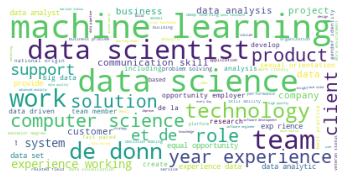

In [ ]:
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt
% matplotlib inline
wordcloud = WordCloud(
                          background_color='white',
                          stopwords=stop_words,
                          max_words=100,
                          max_font_size=50,
                          random_state=42
                         ).generate(str(corpus))
print(wordcloud)
fig = plt.figure(1)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()
fig.savefig("word1.png", dpi=900)

[Text(0, 0, 'data'),
 Text(0, 0, 'experience'),
 Text(0, 0, 'de'),
 Text(0, 0, 'team'),
 Text(0, 0, 'work'),
 Text(0, 0, 'business'),
 Text(0, 0, 'product'),
 Text(0, 0, 'et'),
 Text(0, 0, 'learning'),
 Text(0, 0, 'science'),
 Text(0, 0, 'skill'),
 Text(0, 0, 'opportunity'),
 Text(0, 0, 'working'),
 Text(0, 0, 'analytics'),
 Text(0, 0, 'solution'),
 Text(0, 0, 'le'),
 Text(0, 0, 'model'),
 Text(0, 0, 'technology'),
 Text(0, 0, 'customer'),
 Text(0, 0, 'analysis')]

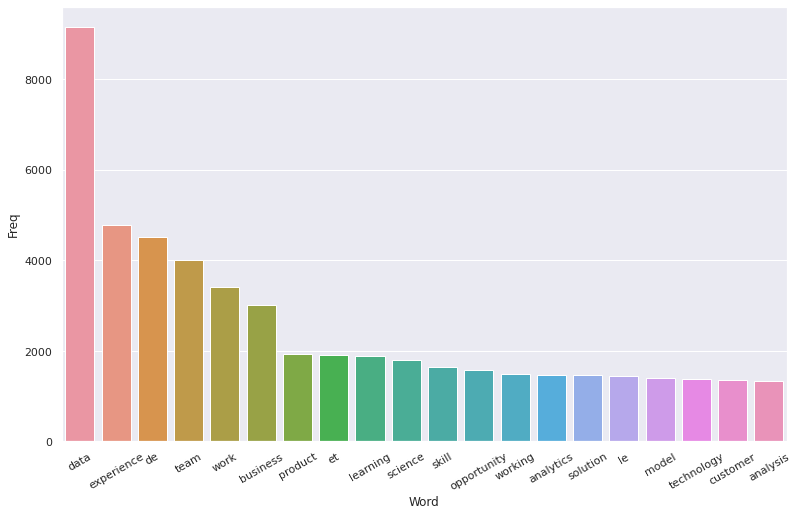

In [ ]:
#Most frequently occuring words
def get_top_n_words(corpus, n=None):
    vec = CountVectorizer().fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in
                   vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1],
                       reverse=True)
    return words_freq[:n]
#Convert most freq words to dataframe for plotting bar plot
top_words = get_top_n_words(corpus, n=20)
top_df = pd.DataFrame(top_words)
top_df.columns=["Word", "Freq"]
#Barplot of most freq words
import seaborn as sns
sns.set(rc={'figure.figsize':(13,8)})
g = sns.barplot(x="Word", y="Freq", data=top_df)
g.set_xticklabels(g.get_xticklabels(), rotation=30)

                 Bi-gram  Freq
0       machine learning  1250
1           data science  1063
2         data scientist   782
3                de donn   558
4       computer science   469
5        year experience   463
6                  et de   398
7     experience working   387
8    communication skill   367
9          data analysis   339
10          data analyst   317
11              data set   305
12     equal opportunity   305
13        data analytics   304
14       experience data   303
15            exp rience   297
16  opportunity employer   295
17           team member   280
18    sexual orientation   274
19                 de la   244


[Text(0, 0, 'machine learning'),
 Text(0, 0, 'data science'),
 Text(0, 0, 'data scientist'),
 Text(0, 0, 'de donn'),
 Text(0, 0, 'computer science'),
 Text(0, 0, 'year experience'),
 Text(0, 0, 'et de'),
 Text(0, 0, 'experience working'),
 Text(0, 0, 'communication skill'),
 Text(0, 0, 'data analysis'),
 Text(0, 0, 'data analyst'),
 Text(0, 0, 'data set'),
 Text(0, 0, 'equal opportunity'),
 Text(0, 0, 'data analytics'),
 Text(0, 0, 'experience data'),
 Text(0, 0, 'exp rience'),
 Text(0, 0, 'opportunity employer'),
 Text(0, 0, 'team member'),
 Text(0, 0, 'sexual orientation'),
 Text(0, 0, 'de la')]

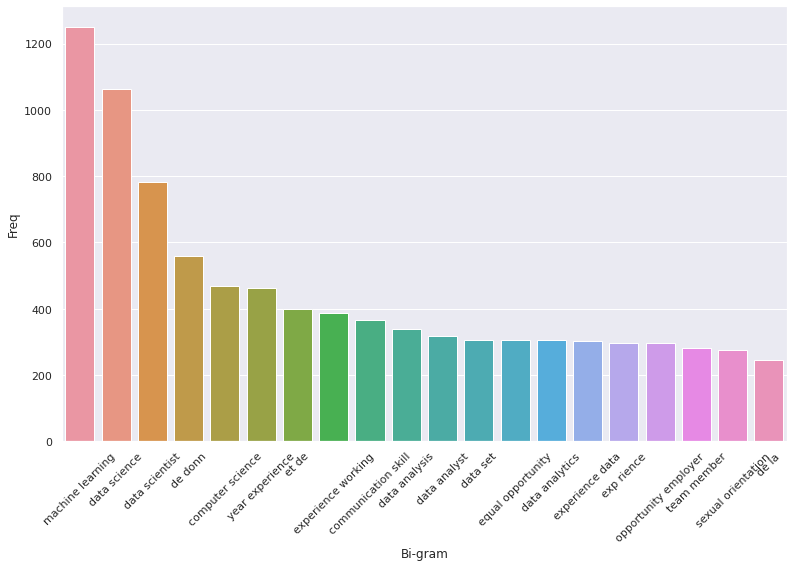

In [ ]:
#Most frequently occuring Bi-grams
def get_top_n2_words(corpus, n=None):
    vec1 = CountVectorizer(ngram_range=(2,2),
            max_features=2000).fit(corpus)
    bag_of_words = vec1.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in
                  vec1.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1],
                reverse=True)
    return words_freq[:n]
top2_words = get_top_n2_words(corpus, n=20)
top2_df = pd.DataFrame(top2_words)
top2_df.columns=["Bi-gram", "Freq"]
print(top2_df)
#Barplot of most freq Bi-grams
import seaborn as sns
sns.set(rc={'figure.figsize':(13,8)})
h=sns.barplot(x="Bi-gram", y="Freq", data=top2_df)
h.set_xticklabels(h.get_xticklabels(), rotation=45)

                        Tri-gram  Freq
0     equal opportunity employer   273
1          problem solving skill   126
2     gender identity expression   119
3         machine learning model   119
4      sexual orientation gender   110
5           year experience data   108
6        degree computer science   107
7    orientation gender identity   105
8                     de donn et   105
9            without regard race    97
10  equal employment opportunity    92
11        fast paced environment    87
12   communication skill ability    87
13           race color religion    85
14         machine learning deep    81
15   written communication skill    81
16         cross functional team    78
17             regard race color    78
18        learning deep learning    77
19               science de donn    76


[Text(0, 0, 'equal opportunity employer'),
 Text(0, 0, 'problem solving skill'),
 Text(0, 0, 'gender identity expression'),
 Text(0, 0, 'machine learning model'),
 Text(0, 0, 'sexual orientation gender'),
 Text(0, 0, 'year experience data'),
 Text(0, 0, 'degree computer science'),
 Text(0, 0, 'orientation gender identity'),
 Text(0, 0, 'de donn et'),
 Text(0, 0, 'without regard race'),
 Text(0, 0, 'equal employment opportunity'),
 Text(0, 0, 'fast paced environment'),
 Text(0, 0, 'communication skill ability'),
 Text(0, 0, 'race color religion'),
 Text(0, 0, 'machine learning deep'),
 Text(0, 0, 'written communication skill'),
 Text(0, 0, 'cross functional team'),
 Text(0, 0, 'regard race color'),
 Text(0, 0, 'learning deep learning'),
 Text(0, 0, 'science de donn')]

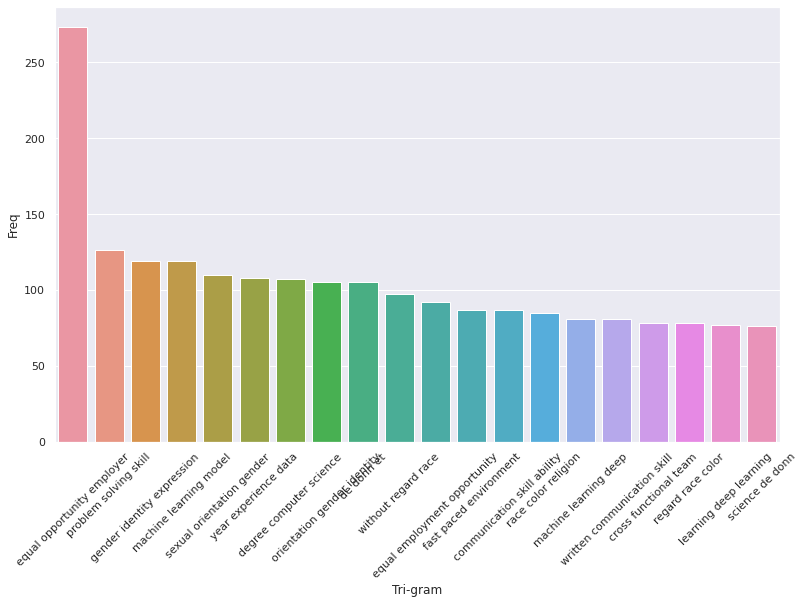

In [ ]:
#Most frequently occuring Tri-grams
def get_top_n3_words(corpus, n=None):
    vec1 = CountVectorizer(ngram_range=(3,3),
           max_features=2000).fit(corpus)
    bag_of_words = vec1.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in
                  vec1.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1],
                reverse=True)
    return words_freq[:n]
top3_words = get_top_n3_words(corpus, n=20)
top3_df = pd.DataFrame(top3_words)
top3_df.columns=["Tri-gram", "Freq"]
print(top3_df)
#Barplot of most freq Tri-grams
import seaborn as sns
sns.set(rc={'figure.figsize':(13,8)})
j=sns.barplot(x="Tri-gram", y="Freq", data=top3_df)
j.set_xticklabels(j.get_xticklabels(), rotation=45)

In [ ]:
from sklearn.feature_extraction.text import TfidfTransformer

tfidf_transformer=TfidfTransformer(smooth_idf=True,use_idf=True)
tfidf_transformer.fit(X)
# get feature names
feature_names=cv.get_feature_names()

# fetch document for which keywords needs to be extracted
doc=corpus[250]

#generate tf-idf for the given document
tf_idf_vector=tfidf_transformer.transform(cv.transform([doc]))

#Function for sorting tf_idf in descending order
from scipy.sparse import coo_matrix
def sort_coo(coo_matrix):
    tuples = zip(coo_matrix.col, coo_matrix.data)
    return sorted(tuples, key=lambda x: (x[1], x[0]), reverse=True)

def extract_topn_from_vector(feature_names, sorted_items, topn=10):
    """get the feature names and tf-idf score of top n items"""

    #use only topn items from vector
    sorted_items = sorted_items[:topn]

    score_vals = []
    feature_vals = []

    # word index and corresponding tf-idf score
    for idx, score in sorted_items:

        #keep track of feature name and its corresponding score
        score_vals.append(round(score, 3))
        feature_vals.append(feature_names[idx])

    #create a tuples of feature,score
    #results = zip(feature_vals,score_vals)
    results= {}
    for idx in range(len(feature_vals)):
        results[feature_vals[idx]]=score_vals[idx]

    return results
#sort the tf-idf vectors by descending order of scores
sorted_items=sort_coo(tf_idf_vector.tocoo())
#extract only the top n; n here is 10
keywords=extract_topn_from_vector(feature_names,sorted_items,15)

# now print the results
print("\nAbstract:")
print(doc)
print("\nKeywords:")
for k in keywords:
    print(k,keywords[k])


Abstract:
epam committed providing global team epamers inspiring career day epamers think creatively lead passion honesty people source success value collaboration work partnership customer strive highest standard excellence today market condition supporting operation hundred client around world remotely matter located join dedicated diverse community help discover fullest potential description curious persistent logical clever true techie heart enjoy living code craft developing elegant solution complex problem sound like could perfect opportunity join epam lead data scientist scroll learn position responsibility requirement looking lead data scientist join growing team remotely working est cst time zone req convert volume structured unstructured customer data advanced analytical solution use fit different mathematical econometric model develop descriptive predictive model deliver better decision turn analyzed data actionable insight business value create high quality data visualizat

SPLIT zzz ig

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
import re
cv=CountVectorizer(max_df=0.8,stop_words=stop_words, max_features=10000, ngram_range=(1,3))
X=cv.fit_transform(corpus)

In [ ]:
count = 0
py = "aws"
for py in df4['Description'].iteritems():
    print(count+1)

In [ ]:
df5.test.str.count("").sum()

0

In [ ]:
def word_count(df5.iloc[0]['Description']):
    counts = dict()
    words = str.split()

    for word in words:
        if word in counts:
            counts[word] += 1
        else:
            counts[word] = 1

    return counts

print( word_count('the quick brown fox jumps over the lazy dog.'))

In [ ]:
doc = data1

from nltk import tokenize
from operator import itemgetter
import math

import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
stop_words = set(stopwords.words('english'))

total_words = doc.split()
total_word_length = len(total_words)

total_sentences = tokenize.sent_tokenize(doc)
total_sent_len = len(total_sentences)

tf_score = {}
for each_word in total_words:
    each_word = each_word.replace('.','')
    if each_word not in stop_words:
        if each_word in tf_score:
            tf_score[each_word] += 1
        else:
            tf_score[each_word] = 1

# Dividing by total_word_length for each dictionary element
tf_score.update((x, y/int(total_word_length)) for x, y in tf_score.items())

def check_sent(word, sentences):
    final = [all([w in x for w in word]) for x in sentences]
    sent_len = [sentences[i] for i in range(0, len(final)) if final[i]]
    return int(len(sent_len))

idf_score = {}
for each_word in total_words:
    each_word = each_word.replace('.','')
    if each_word not in stop_words:
        if each_word in idf_score:
            idf_score[each_word] = check_sent(each_word, total_sentences)
        else:
            idf_score[each_word] = 1

# Performing a log and divide
idf_score.update((x, math.log(int(total_sent_len)/y)) for x, y in idf_score.items())


tf_idf_score = {key: tf_score[key] * idf_score.get(key, 0) for key in tf_score.keys()}

def get_top_n(dict_elem, n):
    result = dict(sorted(dict_elem.items(), key = itemgetter(1), reverse = True)[:n])
    return result

print(get_top_n(tf_idf_score, 5))

{'wealthsimpl': 0.0, 'mission': 0.0, 'help': 0.0, 'everyon': 0.0, 'achiev': 0.0}


ATTEMPTING SPACY

In [ ]:
# import spacy
import spacy

# load english language model
nlp = spacy.load('en_core_web_sm',disable=['ner','textcat'])

text = newcell
nlp.max_length=3808260
# create spacy
doc = nlp(text)

for token in doc:
    print(token.text,'->',token.pos_)

In [ ]:
len(newcell)

3808259

In [ ]:
for token in doc:
    # check token pos
    if token.pos_=='NOUN':
        # print token
        print(token.text)

In [ ]:
# create spacy
doc = nlp(text)

for token in doc:
    print(token.text,'->',token.pos_)

In [ ]:

from spacy import displacy
displacy.render(doc, style='dep',jupyter=True)

In [ ]:
for token in doc:
    # extract subject
    if (token.dep_=='nsubj'):
        print(token.text)
    # extract object
    elif (token.dep_=='dobj'):
        print(token.text)

In [ ]:
newcell = ""

for i in df5['Description']:
  newcell += i

In [ ]:
r.extract_keywords_from_text(newcell)

r.get_ranked_phrases() # To get keyword phrases ranked highest to lowest.

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(max_df=0.9,min_df=2, stop_words='english')
dtm  = cv.fit_transform(df5['Description'])

In [ ]:
dtm

<958x9871 sparse matrix of type '<class 'numpy.int64'>'
	with 239122 stored elements in Compressed Sparse Row format>

text

LDA https://medium.com/analytics-vidhya/keyword-extraction-techniques-using-python-edea5fc35678

In [ ]:
from sklearn.decomposition import LatentDirichletAllocation
lda = LatentDirichletAllocation(n_components=10,random_state=101)

lda_fit  = lda.fit(dtm)

# understanding each topics top 10 common words
for id_value, value in enumerate(lda_fit.components_):
   print(f"The topic would be {id_value}")
   print([cv.get_feature_names()[index] for index in value.argsort()   [-10:]])
   print("\n")

The topic would be 0
['skills', 'models', 'solutions', 'analytics', 'machine', 'science', 'learning', 'team', 'work', 'business']


The topic would be 1
['people', 'business', 'security', 'services', 'arctic', 'wolf', 'software', 'working', 'team', 'work']


The topic would be 2
['help', 'technical', 'science', 'working', 'skills', 'software', 'business', 'development', 'work', 'team']


The topic would be 3
['business', 'world', 'looking', 'learning', 'people', 'company', 'best', 'working', 'team', 'work']


The topic would be 4
['working', 'requirements', 'systems', 'solutions', 'com', 'analyst', 'skills', 'work', 'team', 'business']


The topic would be 5
['le', 'dans', 'une', 'pour', 'en', 'données', 'la', 'les', 'des', 'et']


The topic would be 6
['time', 'development', 'software', 'learning', 'industry', 'knowledge', 'work', 'job', 'skills', 'amdocs']


The topic would be 7
['pour', 'dans', 'du', 'données', 'le', 'les', 'la', 'en', 'des', 'et']


The topic would be 8
['computer'

In [ ]:
# GG https://skeptric.com/notebooks/Parsing%20Experience%20from%20Adzuna%20Job%20Ads.html

import re
import pandas as pd
import spacy
from spacy.util import filter_spans
from spacy.tokens import Span
from spacy.matcher import Matcher
import IPython
from spacy import displacy
from spacy.lang.en.examples import sentences
from IPython.display import HTML, display

In [ ]:
!python -m spacy download en_core_web_sm

In [ ]:
df3 = pd.read_csv(gsearch_jobs.csv)
df3.convert_dtypes()
ads = list(df3.description)

import en_core_web_sm
nlp = en_core_web_sm.load()

NameError: ignored

In [ ]:
def highlight_terms(terms, texts):
    for doc in nlp.pipe(texts):
        for sentence in set([tok.sent for tok in doc if tok.lower_ in terms]):
            text = sentence.text.strip()
            markup = re.sub(fr'(?i)\b({"|".join(terms)})\b', r'<strong>\1</strong>', text)
            display(HTML(markup))

In [ ]:
highlight_terms(['experience'], ads[:10])

In [ ]:
examples = [
    'They will need someone who has at least 1015 years of subsea cable engineering experience',
    'This position is ideally suited to high calibre engineering graduate with significant and appropriate post graduate experience.',
    'Aerospace industry experience would be advantageous covering aerostructures and/or aero engines.',
    'A sufficient and appropriate level of building services and controls experience gained within a client organisation, engineering consultancy or equipment supplier.',

    'Experience in Modelling and Simulation Techniques',
    'Any experience of Pioneer or Miser software would be an advantage.',
    'For this role, you must have a minimum of 10 years experience in subsea engineering, pipelines design or construction.',
    'Has experience within the quality department of a related company in a similar role Ideally from a mechanical or manufacturing engineering background.',
    'and have experience of the technical leadership of projects to time, quality and cost objectives.',
    'Experience of protection and control design at Transmission and Distribution voltages.',
    'Candidates with experience in telesales, callcentre, customer service, receptionist or travel are ideal for this role',
    'Experience dealing with business clients (B2B) would be preferable.',
    'Previous experience working as a Chef de Partie in a one AA Rosette hotel is needed for the position.',
    'The post holder must hold as a minimum Level 1 in Trampolining (British Gymnastics) and have experience in working with children, be fun, outgoing and have excellent customer service skills and be able to instruct in line with the British Gymnastics syllabus.',
    'Experience of techniques such as Discrete Event Simulation and/or SD modelling Mathematical/scientific background',


]

In [ ]:
matcher = Matcher(nlp.vocab)
pattern = [{'POS': 'NOUN', 'OP': '+'}, {'LOWER': 'experience'}]
matcher.add('experience_noun', [pattern])

pattern = [{'LOWER': 'experience'}, {'POS': 'ADP'}, {'POS': {'IN': ('DET', 'NOUN', 'PROPN')}, 'OP': '+'}]
matcher.add('experience_adp', [pattern])

In [ ]:
doc = nlp(examples[0])
matcher(doc)

[(12285600890577657150, 13, 15), (12285600890577657150, 12, 15)]

In [ ]:
def show_extraction(examples, *extractors):
    seen = set()
    for doc in nlp.pipe(examples):
        doc.ents = filter_spans([Span(doc, start, end, label) for extractor in extractors for label, start, end in extractor(doc)])
        for tok in doc:
            if tok.lower_ == 'experience':
                sentence = tok.sent
                if sentence.text in seen:
                    continue
                seen.update([sentence.text])
                if not sentence.ents:
                    doc.ents = list(doc.ents) + [Span(doc, tok.i, tok.i+1, 'MISSING')]
                displacy.render(sentence, style="ent", jupyter=True, options = {'colors': {'MISSING': 'pink',
                                                                            'EXPERIENCE': 'lightgreen'}})


In [ ]:
doc = show_extraction(examples, matcher)

In [ ]:
def get_extractions(examples, *extractors):
    # Could use context instead of enumerate
    for idx, doc in enumerate(nlp.pipe(examples, batch_size=100, disable=['ner'])):
        for ent in filter_spans([Span(doc, start, end, label) for extractor in extractors for label, start, end in extractor(doc)]):
            sent = ent.root.sent
            yield ent.text, idx, ent.start, ent.end, ent.label_, sent.start, sent.end


list(get_extractions(ads[:3], matcher))

[('candidate experience', 0, 274, 276, 'experience_noun', 270, 277),
 ('client experience', 0, 473, 475, 'experience_noun', 447, 476),
 ('client experience', 0, 495, 497, 'experience_noun', 476, 505),
 ('client experience', 0, 511, 513, 'experience_noun', 505, 547),
 ('years experience', 0, 930, 932, 'experience_noun', 923, 964),
 ('experience with Apache Airflow', 0, 974, 978, 'experience_adp', 964, 990),
 ('graduate experience', 1, 413, 415, 'experience_noun', 410, 427),
 ('software development experience', 1, 428, 431, 'experience_noun', 427, 452),
 ('programming languages experience',
  1,
  533,
  536,
  'experience_noun',
  531,
  544),
 ('industry experience', 2, 361, 363, 'experience_noun', 358, 382),
 ('solutions Experience', 2, 376, 378, 'experience_noun', 358, 382),
 ('databases Experience', 2, 384, 386, 'experience_noun', 382, 385),
 ('data structures Experience', 2, 423, 426, 'experience_noun', 414, 440),
 ('Experience with data science toolkits',
  2,
  440,
  445,
  'exp

In [ ]:
def extract_df(*extractors, n_max=None, **kwargs):
    if n_max is None:
        n_max = len(df5)
    ent_df = pd.DataFrame(list(get_extractions(df5[:n_max].Description, *extractors)),
                          columns=['text', 'docidx', 'start', 'end', 'label', 'sent_start', 'sent_end'])
    return ent_df.merge(df5, how='left', left_on='docidx', right_index=True)

In [ ]:
%time ent_df = extract_df(matcher, n_max=1000)
ent_df.head()

CPU times: user 6.35 s, sys: 95.5 ms, total: 6.44 s
Wall time: 6.45 s


,text,docidx,start,end,label,sent_start,sent_end,Title,Image,basecard__fulllink_URL,Title_URL,Title1,jobsearchcard__location,Label,resultbenefits__text,Date,Description
0,graduate experience,0,413,415,experience_noun,410,427,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
1,software development experience,0,428,431,experience_noun,427,452,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
2,programming languages experience,0,533,536,experience_noun,531,544,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
3,world experience,1,418,420,experience_noun,413,457,Data Scientist - NLP,https://media-exp3.licdn.com/dms/image/C4E0BAQ...,https://ca.linkedin.com/jobs/view/data-scienti...,https://ca.linkedin.com/company/arteria-ai?trk...,Arteria AI,"Ontario, Canada",Apply Now,Actively Hiring,3 hours ago,About Arteria AI Arteria AI is a made up o...
4,development experience,1,548,550,experience_noun,541,567,Data Scientist - NLP,https://media-exp3.licdn.com/dms/image/C4E0BAQ...,https://ca.linkedin.com/jobs/view/data-scienti...,https://ca.linkedin.com/company/arteria-ai?trk...,Arteria AI,"Ontario, Canada",Apply Now,Actively Hiring,3 hours ago,About Arteria AI Arteria AI is a made up o...


In [ ]:
def aggregate_df(df, col=['text']):
    return (df
            .groupby(col)
            .agg(n_company=('Title1', 'nunique'),
                 n_ad=('basecard__fulllink_URL', 'nunique'),
                 n_source=('Title_URL', 'nunique'),
                 n=('basecard__fulllink_URL', 'count'))
            .reset_index()
            .sort_values(['n_company', 'n_ad', 'n'], ascending=False)
        )

In [ ]:
aggregate_df(ent_df).head(10)

,text,n_company,n_ad,n_source,n
68,customer experience,2,2,2,2
73,end development experience,2,2,2,2
103,experience in healthcare,2,2,2,2
125,experience with authentication,2,2,2,2
151,work experience,2,2,2,2
1,Customer Experience,1,1,1,1
19,Experience with Databases,1,1,1,1
34,Experience with UNIX,1,1,1,1
38,Experience with cloud providers,1,1,1,1
59,Experience with web application development,1,1,1,1


In [ ]:
def showent(docidx, start, end, label, sent_start, sent_end, **kwargs):
    # We don't need to parse it, so just make_doc
    doc = nlp.make_doc(ads[docidx])
    doc.ents = [Span(doc, start, end, label)]
    sent = doc[sent_start:sent_end]
    displacy.render(sent, style='ent', jupyter=True)

def showent_df(df):
    for idx, row in df.iterrows():
        showent(**row)

In [ ]:
showent_df(ent_df.query('text == "experience in a"').head())

In [ ]:
def extract_noun_phrase_experience(doc):
    for np in doc.noun_chunks:
        if np[-1].lower_ == 'experience':
            if len(np) > 1:
                yield 'EXPERIENCE', np[0].i, np[-1].i

In [ ]:
show_extraction(examples, extract_noun_phrase_experience)

In [ ]:
show_extraction(ads[:10], extract_noun_phrase_experience)

In [ ]:
%time ent_df = extract_df(extract_noun_phrase_experience, n_max=50000)

CPU times: user 6.77 s, sys: 84.8 ms, total: 6.86 s
Wall time: 6.85 s


In [ ]:
aggregate_df(ent_df).head(50)

,text,n_company,n_ad,n_source,n
15,Domain,2,2,2,2
49,The,2,2,2,2
52,a better digital customer,2,2,2,2
79,front end development,2,2,2,2
96,preferred\n,2,2,2,2
117,the technical work,2,2,2,2
122,your,2,2,2,2
123,·,1,1,1,2
5,At least 2 years,1,1,1,1
8,Cloud Formation,1,1,1,1


Fix: span issue | Use character instead of token or vice versa

In [ ]:
#showent_df(ent_df.query("text=='Previous'").head(5))

IndexError: ignored

In [ ]:
showent_df(ent_df.query("text=='Skills'").head(5))

In [ ]:
experience_qualifiers = ['previous', 'prior', 'following', 'recent', 'the above', 'past',

                         'proven', 'demonstrable', 'demonstrated', 'relevant', 'significant', 'practical',
                         'essential', 'equivalent', 'desirable', 'required', 'considerable', 'similar',
                         'working', 'specific', 'qualified', 'direct', 'hands on', 'handson',

                         'strong', 'solid', 'good', 'substantial', 'excellent', 'the right', 'valuable', 'invaluable',

                         'some', 'any', 'none', 'much', 'extensive', 'no', 'more',
                         'your', 'their',
                         'years', 'months',
                         'uk',
                        ]

stopwords = ['a', 'an', '*', '**', '•', 'this', 'the', ':', 'Skills']

experience_qualifier_pattern = rf'\b(?:{"|".join(experience_qualifiers)})\b'

experience_qualifier_pattern

'\\b(?:previous|prior|following|recent|the above|past|proven|demonstrable|demonstrated|relevant|significant|practical|essential|equivalent|desirable|required|considerable|similar|working|specific|qualified|direct|hands on|handson|strong|solid|good|substantial|excellent|the right|valuable|invaluable|some|any|none|much|extensive|no|more|your|their|years|months|uk)\\b'

In [ ]:
aggregate_df(ent_df[(~ent_df.text.str.lower().str.contains(experience_qualifier_pattern)) & # Not a qualifier
                     ~ent_df.text.isin(stopwords)]).head(50)

,text,n_company,n_ad,n_source,n
10,Domain,2,2,2,2
35,The,2,2,2,2
38,a better digital customer,2,2,2,2
58,front end development,2,2,2,2
72,preferred\n,2,2,2,2
84,the technical work,2,2,2,2
87,·,1,1,1,2
5,Cloud Formation,1,1,1,1
16,Java development,1,1,1,1
34,Terraform\n,1,1,1,1


In [ ]:
showent_df(ent_df.query("text=='Commercial'").head(5))

In [ ]:
showent_df(ent_df.query("text=='Management'").head(5))

In [ ]:
showent_df(ent_df.query("text=='Data'").head(5))

In [ ]:
showent_df(ent_df.query("text=='SQL'").head(5))
showent_df(ent_df.query("text=='development'").head(5))

In [ ]:
doc = nlp('Experience of protection and control design at Transmission and Distribution voltages.')
displacy.render([doc], style='dep', jupyter=True)

In [ ]:
def extract_adp_experience(doc, label='EXPERIENCE'):
    for tok in doc:
        if tok.lower_ == 'experience':
            for child in tok.rights:
                if child.dep_ == 'prep':
                    for obj in child.children:
                        if obj.dep_ == 'pobj':
                            yield label, obj.left_edge.i, obj.i+1

In [ ]:
show_extraction(examples, extract_adp_experience)

In [ ]:
def extract_adp_experience_2(doc):
    for np in doc.noun_chunks:
        start_tok = np[0].i
        if start_tok >= 2 and doc[start_tok - 2].lower_ == 'experience' and doc[start_tok - 1].pos_ == 'ADP':
            yield 'EXPERIENCE', start_tok, start_tok + len(np)

In [ ]:
show_extraction(examples, extract_adp_experience_2)

In [ ]:
%time ent_adp_df = extract_df(extract_adp_experience, n_max=50)

CPU times: user 2.27 s, sys: 245 ms, total: 2.51 s
Wall time: 2.51 s


In [ ]:
%time ent_adp_df = extract_df(extract_adp_experience_2, n_max=50)

CPU times: user 2.35 s, sys: 36.3 ms, total: 2.39 s
Wall time: 2.4 s


In [ ]:
%time ent_adp_df = extract_df(extract_adp_experience, n_max=50000)

CPU times: user 6.5 s, sys: 167 ms, total: 6.67 s
Wall time: 6.67 s


In [ ]:
aggregate_df(ent_adp_df).head(50)

,text,n_company,n_ad,n_source,n
63,authentication,2,2,2,2
98,healthcare,2,2,2,2
8,Databases,1,1,1,1
11,ETL,1,1,1,1
24,Machine Learning tools,1,1,1,1
42,UNIX/Linux environments,1,1,1,1
55,a web analytics specialist,1,1,1,1
70,cloud providers,1,1,1,1
86,deep learning algorithms,1,1,1,1
108,mathematical modelling tools,1,1,1,1


In [ ]:
showent_df(ent_adp_df.query("text=='sales'").head(5))

showent_df(ent_adp_df.query("text=='selling'").head(5))

showent_df(ent_adp_df.query("text=='design'").head(5))

showent_df(ent_adp_df.query("text=='C'").head(5))

showent_df(ent_adp_df.query("text=='a'").head(5))

In [ ]:
def highlight_text_context(terms, texts, n_before=1, n_after=2):
    context = []
    for doc in nlp.pipe(texts):
        sentences = list(doc.sents)
        idxs = [i for i, sent in enumerate(sentences) if any(term in sent.text.lower() for term in terms)]

        for idx in idxs:
            before = ''.join(sent.text for sent in sentences[max(idx-n_before, 0):idx])
            after = ''.join(sent.text for sent in sentences[idx+1:min(idx+n_before+1, len(sentences))])
            text = sentences[idx].text
            markup = re.sub(fr'(?i)\b({"|".join(terms)})\b', r'<strong>\1</strong>',
                                 f'<span style="color:blue">{text}</span>')
            display(HTML(before + markup + after))

In [ ]:
terms = ['experience']

for _, q in ent_adp_df.query("text=='a'").head(7).iterrows():
    doc = nlp(q.FullDescription)
    if q.sent_start > 0:
        prev_sent = doc[q.sent_start - 1].sent.text
    else:
        prev_sent = ''

    if q.sent_end < len(doc):
        next_sent = doc[q.sent_end].sent.text
    else:
        next_sent = ''

    text = doc[q.sent_start:q.sent_end].text
    markup = re.sub(fr'(?i)\b({"|".join(terms)})\b', r'<strong>\1</strong>',
                     f'<span style="color:blue">{text}</span>')
    display(HTML(prev_sent + markup + next_sent))

In [ ]:
displacy.render(nlp('Recent care experience within a Nursing Home or Care Home Environment'))

'<svg xmlns="http://www.w3.org/2000/svg" xmlns:xlink="http://www.w3.org/1999/xlink" xml:lang="en" id="233caec7861b498e8dbe121e8220c054-0" class="displacy" width="1975" height="574.5" direction="ltr" style="max-width: none; height: 574.5px; color: #000000; background: #ffffff; font-family: Arial; direction: ltr">\n<text class="displacy-token" fill="currentColor" text-anchor="middle" y="484.5">\n    <tspan class="displacy-word" fill="currentColor" x="50">Recent</tspan>\n    <tspan class="displacy-tag" dy="2em" fill="currentColor" x="50">ADJ</tspan>\n</text>\n\n<text class="displacy-token" fill="currentColor" text-anchor="middle" y="484.5">\n    <tspan class="displacy-word" fill="currentColor" x="225">care</tspan>\n    <tspan class="displacy-tag" dy="2em" fill="currentColor" x="225">NOUN</tspan>\n</text>\n\n<text class="displacy-token" fill="currentColor" text-anchor="middle" y="484.5">\n    <tspan class="displacy-word" fill="currentColor" x="400">experience</tspan>\n    <tspan class="dis

In [ ]:
doc = nlp("Candidates with experience in telesales, callcentre, customer service, receptionist or travel are ideal for this role.")
doc

Candidates with experience in telesales, callcentre, customer service, receptionist or travel are ideal for this role.

In [ ]:
displacy.render(doc)

'<svg xmlns="http://www.w3.org/2000/svg" xmlns:xlink="http://www.w3.org/1999/xlink" xml:lang="en" id="d334c50a61f94684b18013cc99eb216a-0" class="displacy" width="2850" height="399.5" direction="ltr" style="max-width: none; height: 399.5px; color: #000000; background: #ffffff; font-family: Arial; direction: ltr">\n<text class="displacy-token" fill="currentColor" text-anchor="middle" y="309.5">\n    <tspan class="displacy-word" fill="currentColor" x="50">Candidates</tspan>\n    <tspan class="displacy-tag" dy="2em" fill="currentColor" x="50">NOUN</tspan>\n</text>\n\n<text class="displacy-token" fill="currentColor" text-anchor="middle" y="309.5">\n    <tspan class="displacy-word" fill="currentColor" x="225">with</tspan>\n    <tspan class="displacy-tag" dy="2em" fill="currentColor" x="225">ADP</tspan>\n</text>\n\n<text class="displacy-token" fill="currentColor" text-anchor="middle" y="309.5">\n    <tspan class="displacy-word" fill="currentColor" x="400">experience</tspan>\n    <tspan class=

In [ ]:
span = doc[4:5]
span

telesales

In [ ]:
def get_left_span(tok, label='', include=True):
    offset = 1 if include else 0
    idx = tok.i
    while idx > tok.left_edge.i:
        if tok.doc[idx - 1].pos_ in ('NOUN', 'PROPN', 'ADJ', 'X'):
            idx -= 1
        else:
            break
    return label, idx, tok.i+offset

In [ ]:
get_left_span(nlp('The Subsea pipeline engineering')[-1])

('', 1, 4)

In [ ]:
get_left_span(span.root)

('', 4, 5)

In [ ]:
def get_conjugations(tok):
    new = [tok]
    while new:
        tok = new.pop()
        yield tok
        for child in tok.children:
            if child.dep_ == 'conj':
                new.append(child)

In [ ]:
list(get_conjugations(span.root))

[telesales, callcentre, service, receptionist, travel]

In [ ]:
[doc[start:end] for label, start, end in [get_left_span(tok) for tok in get_conjugations(span.root)]]

[telesales, callcentre, customer service, receptionist, travel]

In [ ]:
#old
EXP_TERMS = ['experience']
def extract_adp_conj_experience(doc, label='EXPERIENCE'):
    for tok in doc:
        if tok.lower_ in EXP_TERMS:
            for child in tok.rights:
                if child.dep_ == 'prep':
                    for obj in child.children:
                        if obj.dep_ == 'pobj':
                            for conj in get_conjugations(obj):
                                yield get_left_span(conj, label)

In [ ]:
show_extraction(examples, extract_adp_conj_experience)

In [ ]:
doc = nlp('Any experience of Pioneer or Miser software would be an advantage.')

displacy.render(doc)

'<svg xmlns="http://www.w3.org/2000/svg" xmlns:xlink="http://www.w3.org/1999/xlink" xml:lang="en" id="1e065d3e46c94a7794ae27ffba88a0c0-0" class="displacy" width="1975" height="574.5" direction="ltr" style="max-width: none; height: 574.5px; color: #000000; background: #ffffff; font-family: Arial; direction: ltr">\n<text class="displacy-token" fill="currentColor" text-anchor="middle" y="484.5">\n    <tspan class="displacy-word" fill="currentColor" x="50">Any</tspan>\n    <tspan class="displacy-tag" dy="2em" fill="currentColor" x="50">DET</tspan>\n</text>\n\n<text class="displacy-token" fill="currentColor" text-anchor="middle" y="484.5">\n    <tspan class="displacy-word" fill="currentColor" x="225">experience</tspan>\n    <tspan class="displacy-tag" dy="2em" fill="currentColor" x="225">NOUN</tspan>\n</text>\n\n<text class="displacy-token" fill="currentColor" text-anchor="middle" y="484.5">\n    <tspan class="displacy-word" fill="currentColor" x="400">of</tspan>\n    <tspan class="displacy

In [ ]:
show_extraction(['Any experience of Pioneer software or Miser software would be an advantage.'], extract_adp_conj_experience)

In [ ]:
doc = nlp('Any experience of Pioneer software or Miser software would be an advantage.')

displacy.render(doc)

'<svg xmlns="http://www.w3.org/2000/svg" xmlns:xlink="http://www.w3.org/1999/xlink" xml:lang="en" id="6994c5a7f30a48ceb9361a4d6d26225c-0" class="displacy" width="2150" height="487.0" direction="ltr" style="max-width: none; height: 487.0px; color: #000000; background: #ffffff; font-family: Arial; direction: ltr">\n<text class="displacy-token" fill="currentColor" text-anchor="middle" y="397.0">\n    <tspan class="displacy-word" fill="currentColor" x="50">Any</tspan>\n    <tspan class="displacy-tag" dy="2em" fill="currentColor" x="50">DET</tspan>\n</text>\n\n<text class="displacy-token" fill="currentColor" text-anchor="middle" y="397.0">\n    <tspan class="displacy-word" fill="currentColor" x="225">experience</tspan>\n    <tspan class="displacy-tag" dy="2em" fill="currentColor" x="225">NOUN</tspan>\n</text>\n\n<text class="displacy-token" fill="currentColor" text-anchor="middle" y="397.0">\n    <tspan class="displacy-word" fill="currentColor" x="400">of</tspan>\n    <tspan class="displacy

In [ ]:
show_extraction(ads[:10], extract_adp_conj_experience)

In [ ]:
def extract_verb_maybeadj_noun_experience(doc, label='EXPERIENCE'):
    for tok in doc:
        if tok.lower_ in EXP_TERMS:
            for child in tok.rights:
                if child.dep_ == 'acl':
                    for gc in child.children:
                        if gc.dep_ == 'prep':
                            for ggc in gc.children:
                                if ggc.dep_ == 'pobj':
                                    for c in get_conjugations(ggc):
                                        yield get_left_span(c, 'EXPERIENCE')
                        elif gc.dep_ == 'dobj':
                            for c in get_conjugations(gc):
                                yield get_left_span(c, 'EXPERIENCE')

In [ ]:
show_extraction(examples, extract_verb_maybeadj_noun_experience)

In [ ]:
extract_exps = [extract_adp_conj_experience,]

In [ ]:
len(df3)

961

In [ ]:
n_ads = len(df3)

In [ ]:
%%time
df_ents = extract_df(*extract_exps, n_max=n_ads)

CPU times: user 6.55 s, sys: 112 ms, total: 6.66 s
Wall time: 6.63 s


In [ ]:
df_ents.to_csv('experience_adp_ents.csv', index=False)
df_ents = pd.read_csv('experience_adp_ents.csv', low_memory=False)
df_ents

,text,docidx,start,end,label,sent_start,sent_end,Title,Image,basecard__fulllink_URL,Title_URL,Title1,jobsearchcard__location,Label,resultbenefits__text,Date,Description
0,Proficiency,0,436,437,EXPERIENCE,427,452,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,ETL,1,434,435,EXPERIENCE,413,457,Data Scientist - NLP,https://media-exp3.licdn.com/dms/image/C4E0BAQ...,https://ca.linkedin.com/jobs/view/data-scienti...,https://ca.linkedin.com/company/arteria-ai?trk...,Arteria AI,"Ontario, Canada",Apply Now,Actively Hiring,3 hours ago,About Arteria AI\n\n\n\n\nArteria AI is a made...
2,algorithms,1,488,489,EXPERIENCE,482,501,Data Scientist - NLP,https://media-exp3.licdn.com/dms/image/C4E0BAQ...,https://ca.linkedin.com/jobs/view/data-scienti...,https://ca.linkedin.com/company/arteria-ai?trk...,Arteria AI,"Ontario, Canada",Apply Now,Actively Hiring,3 hours ago,About Arteria AI\n\n\n\n\nArteria AI is a made...
3,mathematical modelling tools,1,505,508,EXPERIENCE,503,530,Data Scientist - NLP,https://media-exp3.licdn.com/dms/image/C4E0BAQ...,https://ca.linkedin.com/jobs/view/data-scienti...,https://ca.linkedin.com/company/arteria-ai?trk...,Arteria AI,"Ontario, Canada",Apply Now,Actively Hiring,3 hours ago,About Arteria AI\n\n\n\n\nArteria AI is a made...
4,web application development,1,555,558,EXPERIENCE,541,567,Data Scientist - NLP,https://media-exp3.licdn.com/dms/image/C4E0BAQ...,https://ca.linkedin.com/jobs/view/data-scienti...,https://ca.linkedin.com/company/arteria-ai?trk...,Arteria AI,"Ontario, Canada",Apply Now,Actively Hiring,3 hours ago,About Arteria AI\n\n\n\n\nArteria AI is a made...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
503,Spark,167,454,455,EXPERIENCE,448,468,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
504,AWS,167,456,457,EXPERIENCE,448,468,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
505,PostgreSQL,167,458,459,EXPERIENCE,448,468,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
506,Kuberneties,167,460,461,EXPERIENCE,448,468,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
showent_df(df_ents[:2])

In [ ]:
df_ent_agg = aggregate_df(df_ents)
df_ent_agg.head(10)

,text,n_company,n_ad,n_source,n
95,authentication,2,2,2,2
152,healthcare,2,2,2,2
154,identity,2,2,2,2
160,life sciences,2,2,2,2
26,Databases,1,1,1,1
31,ETL,1,1,1,1
51,Linux environments,1,1,1,1
56,Machine Learning tools,1,1,1,1
89,algorithms,1,1,1,1
107,cloud providers,1,1,1,1


In [ ]:
len(df_ent_agg)

227

In [ ]:
# !pip install flashtext
from flashtext import KeywordProcessor

  Created wheel for flashtext: filename=flashtext-2.7-py2.py3-none-any.whl size=9309 sha256=5a8b6ae1c09cabb39d1f8aea4a56981842efad90b80ca6708435c5a8f84765e5
  Stored in directory: /root/.cache/pip/wheels/37/db/d7/fe74f7cb8e5c3afed90fe6f4967c933a6f13d81ab6b3d3128c
Successfully built flashtext


In [ ]:
keyword_processor = KeywordProcessor(case_sensitive=True)

In [ ]:
#SHOULD NOT BE 1 SHOULD BE 3
skills = df_ent_agg.query('n_company >= 1').text
len(skills)

18

In [ ]:
skills

95                   authentication
152                      healthcare
154                        identity
160                   life sciences
26                        Databases
31                              ETL
51               Linux environments
56           Machine Learning tools
89                       algorithms
107                 cloud providers
118              dashboarding tools
140                      equivalent
167    mathematical modelling tools
173         more web analysis tools
198              reporting packages
205                    similar work
223        web analytics specialist
225     web application development
Name: text, dtype: object

In [ ]:
for skill in skills:
    keyword_processor.add_keyword(skill)

In [ ]:
from collections import Counter

In [ ]:
%%time
counter = Counter()
ad_counter = Counter()
for ad in ads[:282]: # arbitrary 282 change when dataset grows limit
    keywords = keyword_processor.extract_keywords(ad)
    counter.update(keywords)
    ad_counter.update(set(keywords))


CPU times: user 296 ms, sys: 4.22 ms, total: 300 ms
Wall time: 305 ms


In [ ]:
df_count_ad = pd.DataFrame(ad_counter.items(), columns=['text', 'n_ad_occur'])
df_count = pd.DataFrame(counter.items(), columns=['text', 'n_occur'])

In [ ]:
df_c = (
    df_ent_agg
    .merge(df_count, how='left', validate='1:1')
    .merge(df_count_ad, how='left', validate='1:1')
     .assign(pct_ad_occur = lambda df: df.n_ad_occur / n_ads,
        avg_occur = lambda df: df.n_occur / df.n_ad_occur,
        ad_freq = lambda df: df.n_ad_occur / df.n_ad)
)

In [ ]:
df_c.head(50)

,text,n_company,n_ad,n_source,n,n_occur,n_ad_occur,pct_ad_occur,avg_occur,ad_freq
0,authentication,2,2,2,2,2.0,2.0,0.002081,1.000000,1.0
1,healthcare,2,2,2,2,35.0,17.0,0.017690,2.058824,8.5
2,identity,2,2,2,2,57.0,55.0,0.057232,1.036364,27.5
3,life sciences,2,2,2,2,3.0,3.0,0.003122,1.000000,1.5
4,Databases,1,1,1,1,9.0,8.0,0.008325,1.125000,8.0
5,ETL,1,1,1,1,42.0,34.0,0.035380,1.235294,34.0
6,Linux environments,1,1,1,1,1.0,1.0,0.001041,1.000000,1.0
7,Machine Learning tools,1,1,1,1,1.0,1.0,0.001041,1.000000,1.0
8,algorithms,1,1,1,1,138.0,83.0,0.086368,1.662651,83.0
9,cloud providers,1,1,1,1,1.0,1.0,0.001041,1.000000,1.0


In [ ]:
skills = list(
(df_c
 .query('n_company >= 1') #change 1 to more when more dataset growth
 .query('ad_freq < 100')
).text
)
len(skills)

18

In [ ]:
n_max=1000
for a,b,c in zip(skills[:n_max:3],skills[1:n_max:3],skills[2:n_max:3]):
     print('{:<35}{:<35}{:<}'.format(a,b,c))

authentication                     healthcare                         identity
life sciences                      Databases                          ETL
Linux environments                 Machine Learning tools             algorithms
cloud providers                    dashboarding tools                 equivalent
mathematical modelling tools       more web analysis tools            reporting packages
similar work                       web analytics specialist           web application development


In [ ]:
def filter_ents(query, exact=False, match_case=True):
    if exact and match_case:
        return df_ents[df_ents.text == query]
    elif exact:
        return df_ents[df_ents.text.str.lower() == query.lower()]
    else:
        return df_ents[df_ents.text.str.contains(fr'\b{query}\b', flags = 0 if match_case else re.IGNORECASE)]

In [ ]:
def show_exp(query, exact=True, match_case=True, n_max=10):
    showent_df(filter_ents(query, exact, match_case)[:n_max])

In [ ]:
def job_exp(query, exact=True, match_case=True):
    return filter_ents(query, exact, match_case).drop_duplicates('docidx')[['Company', 'Title']]

In [ ]:
def related_experience(query, exact=True, match_case=True):
    return (
     df_ents[df_ents['docidx'].isin(filter_ents(query, exact, match_case).docidx.to_numpy())]
     .query('label == "EXPERIENCE"')
     .groupby('text')
     .agg(n=('text', 'count'),
      ads = ('docidx', 'nunique'),
      advertisers = ('Title1', 'nunique'),
     )
  .query('advertisers > 1')
  .sort_values(['advertisers', 'ads', 'n'], ascending=False)
 )

In [ ]:
show_exp('Experience', n_max=4)

IndexError: ignored

In [ ]:
show_exp('sales', n_max=5)

In [ ]:
related_experience('Python').head(15)

,n,ads,advertisers
text,,,


In [ ]:
related_experience('Javascript').head(15)

,n,ads,advertisers
text,,,
